In [457]:
df_final = pd.read_csv("/Users/andreas/Desktop/03 - Le Wagon/final_data.v3.csv")

In [499]:
df_final.columns

Index(['Unnamed: 0', 'Organization Name', 'IPO Status', 'Number of Founders',
       'Company Type', 'CB Rank (Company)', 'Operating Status',
       'Industry Groups', 'Number of Employees', 'Estimated Revenue Range',
       'Number of Exits', 'Number of Sub-Orgs', 'city', 'state',
       'funding_status', 'revenue_range', 'no_employees', 'no_founders',
       'industry_groups', 'website', 'phone', 'email', 'linkedin', 'twitter',
       'facebook', 'articles', 'founded_year', 'last_funding_year',
       'exit_year', 'closed_year', 'no_investors', 'no_fund_rounds',
       'acquired', 'private_ipo', 'company_type', 'operting_status',
       'no_lead_investors', 'no_sub_orgs', 'no_exits', 'has_preseed',
       'has_seed', 'has_series_a', 'has_series_b', 'has_series_c',
       'has_series_d', 'has_series_e', 'has_angel', 'has_debt_financing',
       'has_grant', 'has_corporate_round', 'has_series_x', 'has_other_funding',
       'preseed_fund', 'seed_fund', 'series_a_fund', 'series_b_fund',

In [526]:
df_final["Estimated Revenue Range"].unique()

array(['$100M to $500M', nan, '$1M to $10M', '$10M to $50M',
       '$50M to $100M', 'Less than $1M', '$10B+', '$500M to $1B',
       '$1B to $10B'], dtype=object)

/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/ipykernel_47753/2785712561.py:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Months Since Founded'], label=funding_type, shade=True)
/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/ipykernel_47753/2785712561.py:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Months Since Founded'], label=funding_type, shade=True)
/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/ipykernel_47753/2785712561.py:37: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Months Since Founded'], label=funding_type, shade=True)
/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/

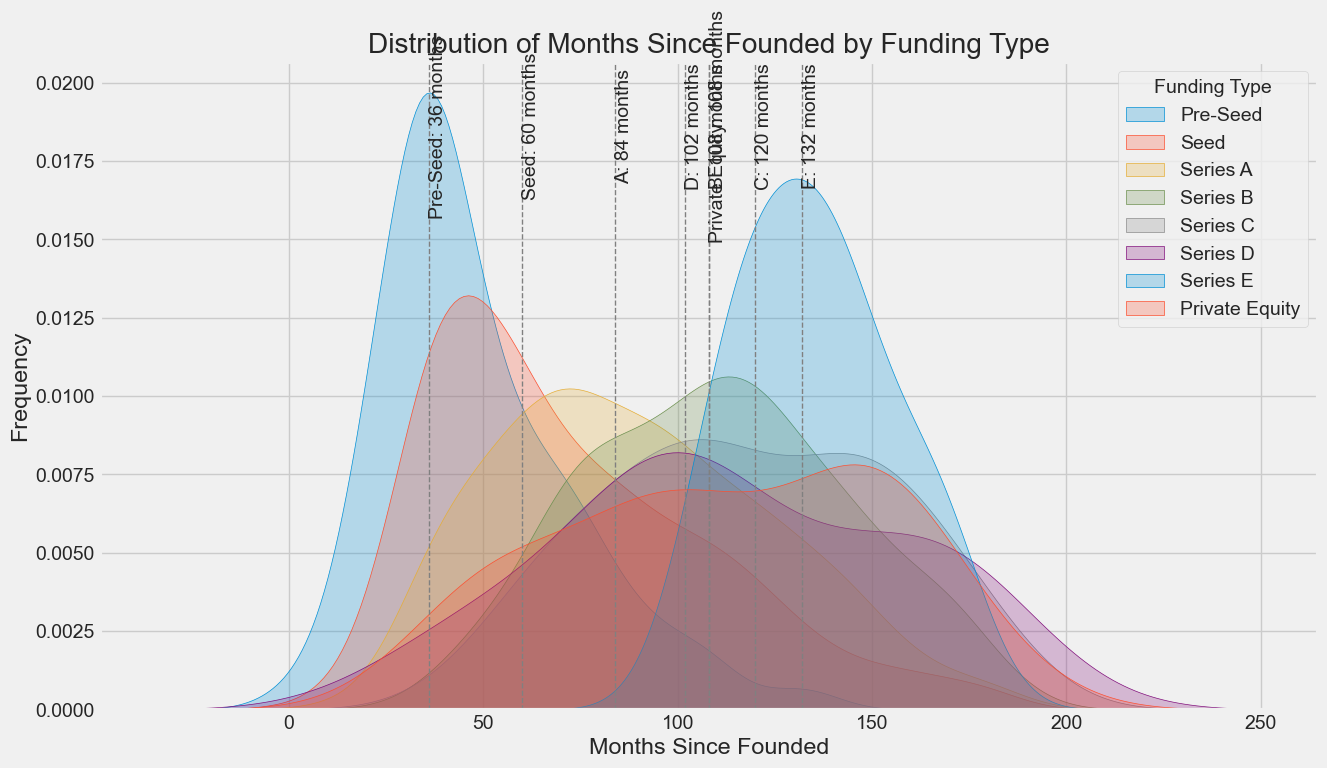

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the desired funding types and their simplified labels
desired_funding_types = {
    'Pre-Seed': 'Pre-Seed',
    'Seed': 'Seed',
    'Series A': 'A',
    'Series B': 'B',
    'Series C': 'C',
    'Series D': 'D',
    'Series E': 'E',
    'Private Equity': 'Private Equity'
}

# Update the 'last_funding_type' column to combine all rounds after Series E into "Private Equity"
df_final['last_funding_type'] = df_final['last_funding_type'].replace(['Series F', 'Series G'], 'Private Equity')

# Add 'Months Since Founded' column if not already added
if 'Months Since Founded' not in df_final.columns:
    df_final['Months Since Founded'] = (pd.to_datetime('today').year - df_final['founded_year']) * 12

# Filter out rows with invalid or missing values for 'Months Since Founded'
df_final = df_final[np.isfinite(df_final['Months Since Founded'])]

# Set plot style
plt.style.use('fivethirtyeight')

# Create combined KDE plot for all funding types
plt.figure(figsize=(14, 8))

# Iterate through each funding type and plot the KDE
for funding_type, short_label in desired_funding_types.items():
    subset = df_final[df_final['last_funding_type'] == funding_type]
    sns.kdeplot(subset['Months Since Founded'], label=funding_type, shade=True)
    
    # Calculate and plot the median
    median = subset['Months Since Founded'].median()
    plt.axvline(median, linestyle='--', color='gray', linewidth=1, label='_nolegend_')
    plt.text(median, plt.ylim()[1]*0.9, f'{short_label}: {median:.0f} months', rotation=90, verticalalignment='center')

plt.title('Distribution of Months Since Founded by Funding Type')
plt.xlabel('Months Since Founded')
plt.ylabel('Frequency')
plt.legend(title='Funding Type')
plt.show()


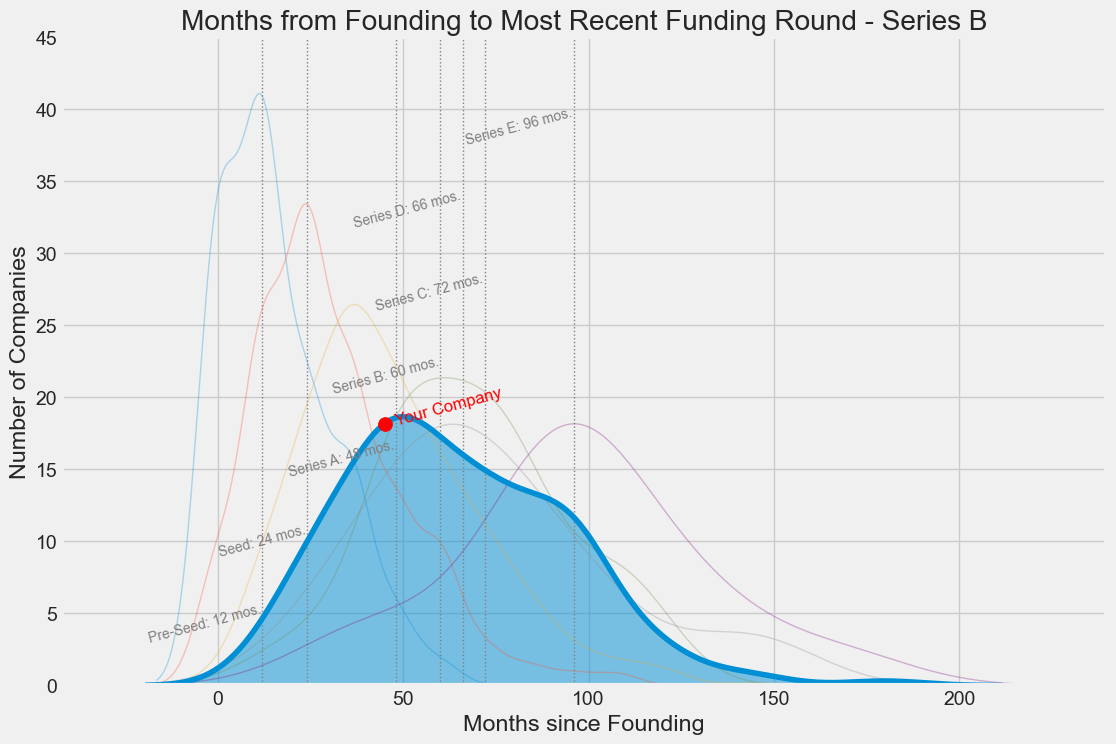

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming df_final is already loaded in your local environment

# Set the style
plt.style.use('fivethirtyeight')

# Filter out rows with NaN values in 'Months Since Founding' and non-negative months
df_filtered = df_final.dropna(subset=['Months Since Founding'])
df_filtered = df_filtered[df_filtered['Months Since Founding'] >= 0]

# List of rounds to consider
considered_rounds = ['Pre-Seed', 'Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E']
df_filtered['funding_category'] = df_filtered['last_funding_type'].apply(lambda x: x if x in considered_rounds else np.nan)
df_filtered = df_filtered.dropna(subset=['funding_category'])

# Define a hypothetical company
hypothetical_company = {
    'funding_category': 'Series B',
    'Months Since Founding': 45
}

# Create a KDE plot
plt.figure(figsize=(12, 8))

total_companies = len(df_filtered)
y_text_positions = np.linspace(0.1, 0.9, len(considered_rounds))

# Dictionary to store KDE data for interpolation
kde_data = {}

for i, round in enumerate(considered_rounds):
    subset = df_filtered[df_filtered['funding_category'] == round]['Months Since Founding']
    kde = sns.kdeplot(subset, label=round, linestyle='-', linewidth=1.5 if round == hypothetical_company['funding_category'] else 1, fill=True if round == hypothetical_company['funding_category'] else False, alpha=0.5 if round == hypothetical_company['funding_category'] else 0.3)
    
    # Store KDE data
    kde_x, kde_y = kde.get_lines()[-1].get_data()
    kde_data[round] = (kde_x, kde_y)
    
    # Median line
    median_value = subset.median()
    plt.axvline(median_value, linestyle='dotted', linewidth=1, color='grey')
    plt.text(median_value, plt.ylim()[1] * y_text_positions[i], f'{round}: {int(median_value)} mos.', rotation=15, ha='right', va='center', fontsize=10, color='grey')

# Highlight hypothetical company
kde_values = sns.kdeplot(df_filtered[df_filtered['funding_category'] == hypothetical_company['funding_category']]['Months Since Founding']).get_lines()[-1].get_data()
kde_values_y = np.interp(hypothetical_company['Months Since Founding'], kde_values[0], kde_values[1])
plt.scatter(hypothetical_company['Months Since Founding'], kde_values_y, color='red', s=100, zorder=5)
plt.text(hypothetical_company['Months Since Founding'], kde_values_y * 1.06, '  Your Company', color='red', fontsize=12, rotation=15, ha='left', va='center')

# Adjust y-axis to represent the number of companies in increments of 5 from 0 to 40
max_companies = 45
plt.ylim(0, max_companies / total_companies)
y_ticks = np.arange(0, max_companies + 5, 5)
plt.gca().set_yticks(y_ticks / total_companies)
plt.gca().set_yticklabels([f'{int(tick)}' for tick in y_ticks])

# Labels and title
plt.xlabel('Months since Founding')
plt.ylabel('Number of Companies')
plt.title(f'Months from Founding to Most Recent Funding Round - {hypothetical_company["funding_category"]}')
# Remove the legend as requested
plt.legend().remove()

plt.show()

In [455]:
df_final = pd.read_csv("/Users/andreas/Desktop/03 - Le Wagon/final_data.v3.csv")

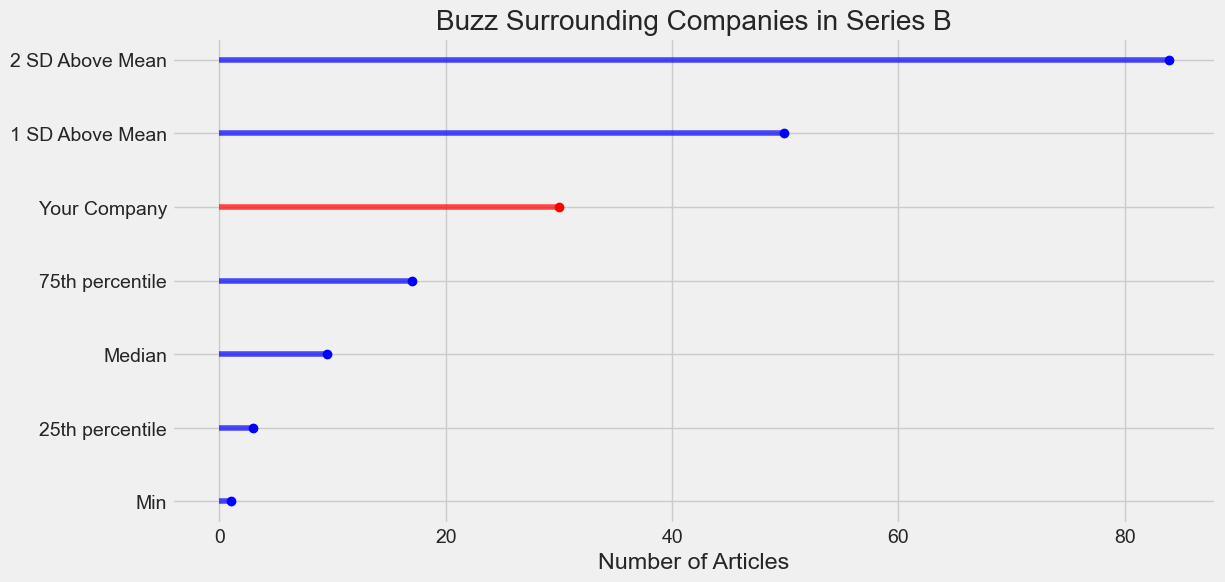

In [352]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming df_final is already loaded in your local environment

# Set the style
plt.style.use('fivethirtyeight')

# Convert 'articles' column to numeric, forcing errors to NaN, then drop NaNs and 0 values
df_final['articles'] = pd.to_numeric(df_final['articles'], errors='coerce')
df_articles_filtered = df_final.dropna(subset=['articles'])
df_articles_filtered = df_articles_filtered[df_articles_filtered['articles'] > 0]

# Specify the funding round to analyze
funding_round = 'Series B'

# Filter the dataframe for the specified funding round
df_round_filtered = df_articles_filtered[df_articles_filtered['last_funding_type'] == funding_round]

# Calculate statistics for the funding round
mean_articles = df_round_filtered['articles'].mean()
std_articles = df_round_filtered['articles'].std()
stats = {
    'Min': df_round_filtered['articles'].min(),
    '25th percentile': df_round_filtered['articles'].quantile(0.25),
    'Median': df_round_filtered['articles'].median(),
    '75th percentile': df_round_filtered['articles'].quantile(0.75),
    '1 SD Above Mean': mean_articles + 1 * std_articles,
    '2 SD Above Mean': mean_articles + 2 * std_articles
}

# Define a hypothetical company
hypothetical_company_articles = 30

# Combine stats and hypothetical company
all_values = list(stats.values()) + [hypothetical_company_articles]
all_labels = list(stats.keys()) + ['Your Company']
sorted_indices = np.argsort(all_values)

sorted_values = np.array(all_values)[sorted_indices]
sorted_labels = np.array(all_labels)[sorted_indices]

# Create the lollipop chart
plt.figure(figsize=(12, 6))

# Plot the lollipop chart
for i, value in enumerate(sorted_values):
    color = 'red' if sorted_labels[i] == 'Your Company' else 'blue'
    plt.hlines(y=sorted_labels[i], xmin=0, xmax=value, color=color, alpha=0.7)
    plt.plot(value, sorted_labels[i], 'o', color=color)

# Set the labels and title
plt.xlabel('Number of Articles')
plt.title('Buzz Surrounding Companies in Series B')

plt.show()

/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/ipykernel_47753/156248602.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='funding_category', y='total_funding_usd', data=df_funding_filtered,


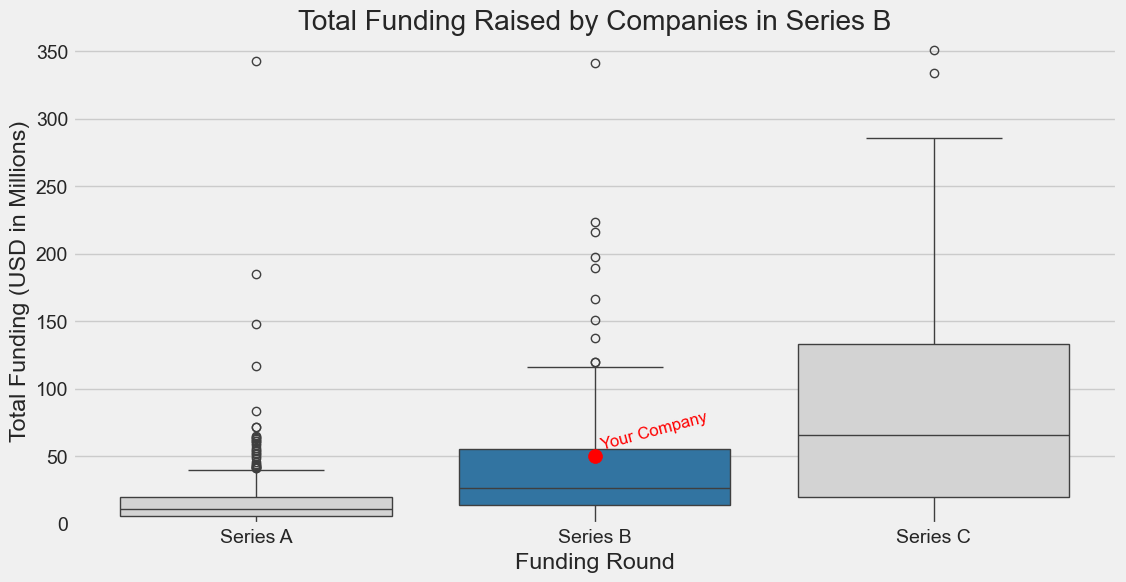

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_final is already loaded in your local environment

# Set the style
plt.style.use('fivethirtyeight')

# Convert 'total_funding_usd' column to numeric, forcing errors to NaN, then drop NaNs
df_final['total_funding_usd'] = pd.to_numeric(df_final['total_funding_usd'], errors='coerce')
df_funding_filtered = df_final.dropna(subset=['total_funding_usd'])

# Convert the total funding to millions of dollars
df_funding_filtered['total_funding_usd'] = df_funding_filtered['total_funding_usd'] / 1e6

# List of rounds to consider: Series A, Series B, Series C
considered_rounds = ['Series A', 'Series B', 'Series C']
df_funding_filtered['funding_category'] = df_funding_filtered['last_funding_type'].apply(lambda x: x if x in considered_rounds else np.nan)
df_funding_filtered = df_funding_filtered.dropna(subset=['funding_category'])

# Define a hypothetical company
hypothetical_company_funding = {
    'funding_category': 'Series B',
    'total_funding_usd': 50  # Example value in millions
}

# Create the box plot
plt.figure(figsize=(12, 6))

# Draw the box plots
sns.boxplot(x='funding_category', y='total_funding_usd', data=df_funding_filtered, 
            order=considered_rounds, palette=["#d3d3d3" if round != hypothetical_company_funding['funding_category'] else "#1f77b4" for round in considered_rounds])

# Highlight the hypothetical company
plt.scatter(hypothetical_company_funding['funding_category'], hypothetical_company_funding['total_funding_usd'], color='red', s=100, zorder=5)
plt.text(hypothetical_company_funding['funding_category'], hypothetical_company_funding['total_funding_usd'] * 1.04, ' Your Company', color='red', fontsize=12, rotation=15, ha='left', va='bottom')

# Set the y-axis limit to 360 million USD
plt.ylim(0, 360)

# Set the labels and title
plt.xlabel('Funding Round')
plt.ylabel('Total Funding (USD in Millions)')
plt.title('Total Funding Raised by Companies in Series B')

plt.show()

In [444]:
df_final = pd.read_csv("/Users/andreas/Desktop/03 - Le Wagon/final_data.v3.csv")

/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/ipykernel_47753/4113134675.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_series_b['total_funding_usd'] = pd.to_numeric(df_series_b['total_funding_usd'], errors='coerce')
/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/ipykernel_47753/4113134675.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_series_b['Number of Employees'] = pd.to_numeric(df_series_b['Number of Employees'], errors='coerce')


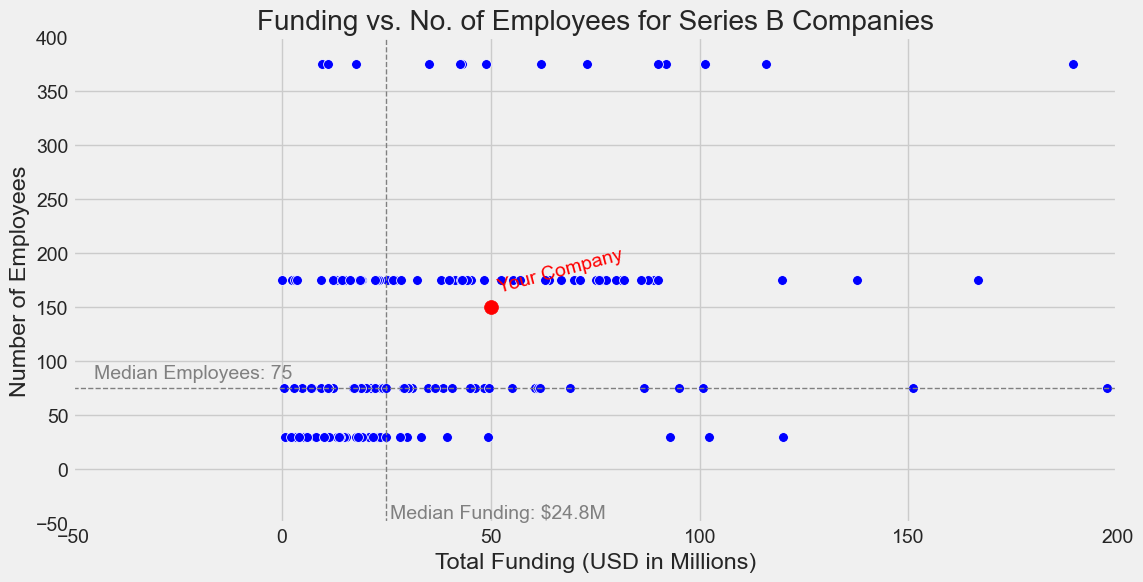

In [445]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming df_final is already loaded in your local environment

# Define a function to convert employee range to midpoint
def convert_employee_range(employee_range):
    if pd.isna(employee_range):
        return np.nan
    if employee_range == '1-10':
        return 5.5
    elif employee_range == '11-50':
        return 30.5
    elif employee_range == '51-100':
        return 75.5
    elif employee_range == '101-250':
        return 175.5
    elif employee_range == '251-500':
        return 375.5
    elif employee_range == '501-1000':
        return 750.5
    elif employee_range == '1001-5000':
        return 3000.5
    elif employee_range == '5001-10000':
        return 7500.5
    elif employee_range == '10001+':
        return 15000.5
    else:
        return np.nan

# Apply the conversion function
df_final['Number of Employees'] = df_final['Number of Employees'].apply(convert_employee_range)

# Filter for the specified funding round: Series B before any other filtering
funding_round = 'Series B'
df_series_b = df_final[df_final['last_funding_type'] == funding_round]

# Convert relevant columns to numeric, forcing errors to NaN
df_series_b['total_funding_usd'] = pd.to_numeric(df_series_b['total_funding_usd'], errors='coerce')
df_series_b['Number of Employees'] = pd.to_numeric(df_series_b['Number of Employees'], errors='coerce')

# Drop NaNs and 0 values
df_series_b_filtered = df_series_b.dropna(subset=['total_funding_usd', 'Number of Employees'])
df_series_b_filtered = df_series_b_filtered[(df_series_b_filtered['total_funding_usd'] > 0) & (df_series_b_filtered['Number of Employees'] > 0)]

# Convert total funding to millions of dollars
df_series_b_filtered['total_funding_usd'] = df_series_b_filtered['total_funding_usd'] / 1e6

# Cap the total funding at 200 million and the number of employees at 400
df_series_b_filtered = df_series_b_filtered[(df_series_b_filtered['total_funding_usd'] <= 200) & (df_series_b_filtered['Number of Employees'] <= 400)]

# Calculate medians for funding and number of employees within the capped data
median_funding = df_series_b_filtered['total_funding_usd'].median()
median_employees = df_series_b_filtered['Number of Employees'].median()

# Define a hypothetical company
hypothetical_company = {
    'total_funding_usd': 50,  # Example value in millions
    'Number of Employees': 150  # Example value
}

# Create the scatterplot
plt.figure(figsize=(12, 6))

# Scatter plot for companies
sns.scatterplot(x='total_funding_usd', y='Number of Employees', data=df_series_b_filtered, color='blue', s=50)

# Plot median lines
plt.axhline(y=median_employees, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=median_funding, color='gray', linestyle='--', linewidth=1)

# Add labels for the median lines
plt.text(median_funding + 1, -45, f'Median Funding: ${median_funding:.1f}M', color='gray', ha='left')
plt.text(-45, median_employees + 5, f'Median Employees: {int(median_employees)}', color='gray', va='bottom')

# Highlight the hypothetical company
plt.scatter(hypothetical_company['total_funding_usd'], hypothetical_company['Number of Employees'], color='red', s=100, zorder=5)
plt.text(hypothetical_company['total_funding_usd'], hypothetical_company['Number of Employees'] + 10, ' Your Company', color='red', fontsize=14, rotation=15, ha='left', va='bottom')

# Set the labels and title
plt.ylabel('Number of Employees')
plt.xlabel('Total Funding (USD in Millions)')
plt.title('Funding vs. No. of Employees for Series B Companies')

# Set limits to ensure the intersection is at the median values and cut off axes at -50
plt.xlim(-50, 200)
plt.ylim(-50, 400)

# Show plot
plt.show()

In [447]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap

# Standardize city names in df_final
df_final['city'] = df_final['city'].replace({'München': 'Munich', 'Köln': 'Cologne'})

# Define the industry groups (for reference)
industry_groups = [
    'Consumer Goods and Services', 'Health and Biotechnology', 'Industrial and Manufacturing',
    'Technology and Software', 'Government and Military', 'Community and Social Services',
    'Finance and Professional Services', 'Miscellaneous', 'Media and Entertainment'
]

# Group by city and industry and count the number of companies
industry_city_counts = df_final.groupby(['city', 'industry_groups']).size().reset_index(name='count')

# Initialize a dictionary to store ecosystem scores
ecosystem_scores = {}

# Calculate the ecosystem score for each industry
for industry in industry_groups:
    # Filter data for the current industry
    industry_data = industry_city_counts[industry_city_counts['industry_groups'] == industry]
    
    # Sort by count and select top 20 cities
    top_cities = industry_data.sort_values(by='count', ascending=False).head(20)
    
    # Calculate the percentile rank
    top_cities['percentile'] = top_cities['count'].rank(pct=True)
    
    # Convert percentile to ecosystem score (0-10 scale)
    top_cities['ecosystem_score'] = top_cities['percentile'] * 10
    
    # Store the scores in the dictionary
    for _, row in top_cities.iterrows():
        ecosystem_scores[(row['city'], row['industry_groups'])] = np.round(row['ecosystem_score'], 1)

# Function to get the ecosystem score for a company
def get_ecosystem_score(city, industry):
    return ecosystem_scores.get((city, industry), 0.0)

# Add the ecosystem score to df_final
df_final['ecosystem_score'] = df_final.apply(lambda row: get_ecosystem_score(row['city'], row['industry_groups']), axis=1)

# Filter the top 10 cities for Technology and Software
tech_software_scores = {k: v for k, v in ecosystem_scores.items() if k[1] == 'Technology and Software'}
tech_software_df = pd.DataFrame(list(tech_software_scores.items()), columns=['City_Industry', 'Ecosystem_Score'])
tech_software_df[['City', 'Industry']] = pd.DataFrame(tech_software_df['City_Industry'].tolist(), index=tech_software_df.index)
tech_software_df = tech_software_df.drop(columns=['City_Industry', 'Industry'])
tech_software_df = tech_software_df.sort_values(by='Ecosystem_Score', ascending=False).head(10)

# Get coordinates for the cities
geolocator = Nominatim(user_agent="geoapiExercises")

def get_coordinates(city):
    location = geolocator.geocode(city + ', Germany')
    if location:
        return location.latitude, location.longitude
    else:
        return np.nan, np.nan

tech_software_df['Latitude'], tech_software_df['Longitude'] = zip(*tech_software_df['City'].apply(get_coordinates))

# Drop rows with NaN coordinates
tech_software_df = tech_software_df.dropna(subset=['Latitude', 'Longitude'])

# Normalize the ecosystem scores for the circle radius
min_score = tech_software_df['Ecosystem_Score'].min()
max_score = tech_software_df['Ecosystem_Score'].max()
tech_software_df['normalized_radius'] = 10 + 20 * (tech_software_df['Ecosystem_Score'] - min_score) / (max_score - min_score)  # Scale between 10 and 30

# Create the heat map
m = folium.Map(location=[51.1657, 10.4515], zoom_start=6)  # Coordinates for Germany

# Create a heatmap layer with adjusted radius
heat_data = [
    [row['Latitude'], row['Longitude'], row['normalized_radius']] for index, row in tech_software_df.iterrows()
]

HeatMap(heat_data, radius=20, blur=10, max_zoom=1).add_to(m)

# Add markers with ecosystem scores
for index, row in tech_software_df.iterrows():
    folium.map.Marker(
        location=[row['Latitude'], row['Longitude']],
        icon=folium.DivIcon(html=f"""<div style="font-family: Arial; color: black; font-weight: bold; font-size: 12px; padding: 2px; border-radius: 3px;">{row['Ecosystem_Score']}</div>""")
    ).add_to(m)

# Add a hypothetical "Your Company" marker in the fourth-ranked city
if len(tech_software_df) >= 4:
    your_company_city = tech_software_df.iloc[4]
    folium.Marker(
        location=[your_company_city['Latitude'] + 0.1, your_company_city['Longitude'] + 0.1],
        icon=folium.Icon(color='red', icon='remove-sign'),  # X marker
        popup='Your Company'
    ).add_to(m)
    
    folium.map.Marker(
        location=[your_company_city['Latitude'] + 0.1, your_company_city['Longitude'] + 0.1],
        icon=folium.DivIcon(html=f"""<div style="font-family: Arial; color: red; font-weight: bold; font-size: 12px; transform: rotate(15deg); white-space: nowrap;">Your Company</div>""")
    ).add_to(m)

# Display the map
m.save("tech_software_heatmap.html")

# Optionally, to display in a Jupyter notebook (uncomment the line below)
m

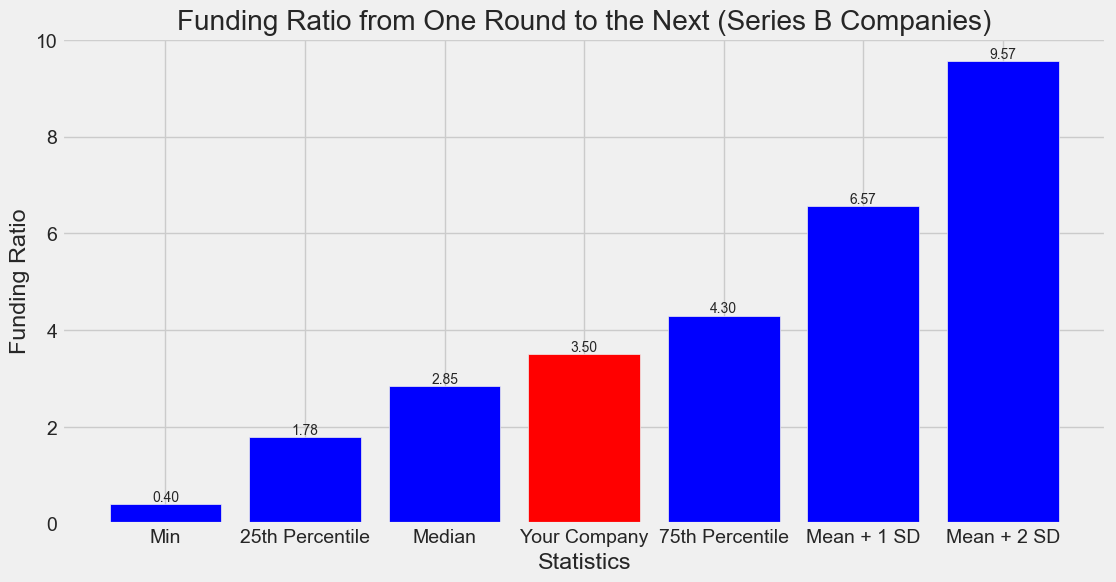

In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the style
plt.style.use('fivethirtyeight')

# Assuming df_final is already loaded in your local environment

# Filter for Series B companies
df_series_b = df_final[df_final['last_funding_type'] == 'Series B']

# Define the columns for funding ratios
funding_ratios = ['seed_to_pre_ratio', 'a_to_seed_ratio', 'b_to_a_ratio', 'c_to_b_ratio', 'd_to_c_ratio', 'e_to_d_ratio']

# Melt the dataframe to get all ratios in one column
df_ratios = df_series_b[funding_ratios].melt(var_name='round', value_name='ratio')

# Drop NaN values and zero values
df_ratios = df_ratios.dropna(subset=['ratio'])
df_ratios = df_ratios[df_ratios['ratio'] > 0]

# Calculate the statistics
min_value = df_ratios['ratio'].min()
percentile_25 = df_ratios['ratio'].quantile(0.25)
median_value = df_ratios['ratio'].median()
percentile_75 = df_ratios['ratio'].quantile(0.75)
mean_value = df_ratios['ratio'].mean()
std_dev = df_ratios['ratio'].std()
one_std_dev = mean_value + std_dev
two_std_dev = mean_value + 2 * std_dev

# Define a hypothetical company ratio
hypothetical_ratio = 3.5  # Example value

# Collect all statistics
stats = {
    'Min': min_value,
    '25th Percentile': percentile_25,
    'Median': median_value,
    '75th Percentile': percentile_75,
    'Mean + 1 SD': one_std_dev,
    'Mean + 2 SD': two_std_dev,
    'Your Company': hypothetical_ratio
}

# Print the statistics
#for stat, value in stats.items():
#    print(f'{stat}: {value}')

# Sort the statistics for plotting
sorted_stats = dict(sorted(stats.items(), key=lambda item: item[1]))

# Create the histogram
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_stats.keys(), sorted_stats.values(), color=['blue' if k != 'Your Company' else 'red' for k in sorted_stats.keys()])

# Add text labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Labels and title
plt.xlabel('Statistics')
plt.ylabel('Funding Ratio')
plt.title('Funding Ratio from One Round to the Next (Series B Companies)')

plt.show()

/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/ipykernel_47753/2082065928.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = melted_df.pivot('industry_groups', 'Funding Stage', 'Mean Growth Ratio')


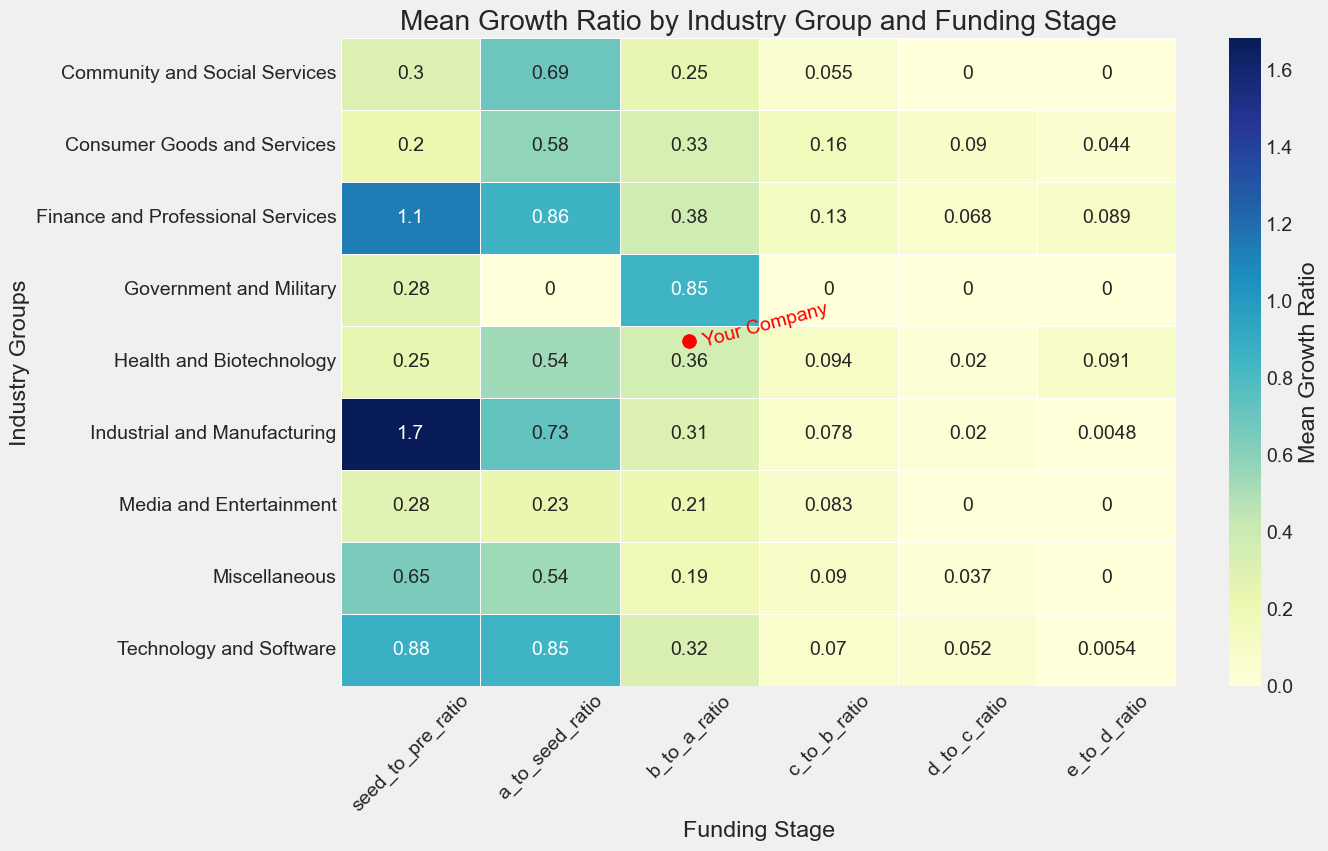

In [484]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_final is already loaded in your local environment

# Set the style
plt.style.use('fivethirtyeight')

# List of funding ratio columns in chronological order
funding_ratios = ['seed_to_pre_ratio', 'a_to_seed_ratio', 'b_to_a_ratio', 'c_to_b_ratio', 'd_to_c_ratio', 'e_to_d_ratio']

# Calculate mean growth ratio for each industry group at each funding stage
mean_growth_ratios = df_final.groupby('industry_groups')[funding_ratios].mean().reset_index()

# Melt the DataFrame to make it suitable for a heat map
melted_df = mean_growth_ratios.melt(id_vars='industry_groups', var_name='Funding Stage', value_name='Mean Growth Ratio')

# Ensure the funding stages are in chronological order
melted_df['Funding Stage'] = pd.Categorical(melted_df['Funding Stage'], categories=funding_ratios, ordered=True)

# Create the heat map
plt.figure(figsize=(12, 8))
heatmap_data = melted_df.pivot('industry_groups', 'Funding Stage', 'Mean Growth Ratio')
ax = sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Mean Growth Ratio'}, linewidths=.5)

# Add a marker for "Your Company"
your_company_industry = 'Health and Biotechnology'
your_company_stage = 'b_to_a_ratio'
plt.scatter(funding_ratios.index(your_company_stage) + 0.5, 
            heatmap_data.index.get_loc(your_company_industry) + 0.2, 
            color='red', s=100, zorder=5)
plt.text(funding_ratios.index(your_company_stage) + 0.55, 
         heatmap_data.index.get_loc(your_company_industry), 
         ' Your Company', color='red', fontsize=14, rotation=15, ha='left', va='center')

# Labels and title
plt.xlabel('Funding Stage')
plt.ylabel('Industry Groups')
plt.title('Mean Growth Ratio by Industry Group and Funding Stage')

# Adjust x-axis labels for better readability
plt.xticks(rotation=45)

# Save the figure
#plt.savefig('/Users/andreas/Desktop/03 - Le Wagon/Data ViZ/mean_growth_ratio_heat_map_with_your_company.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/ipykernel_47753/2475659105.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = melted_df.pivot('industry_groups', 'Funding Stage', 'Mean Total Funding')


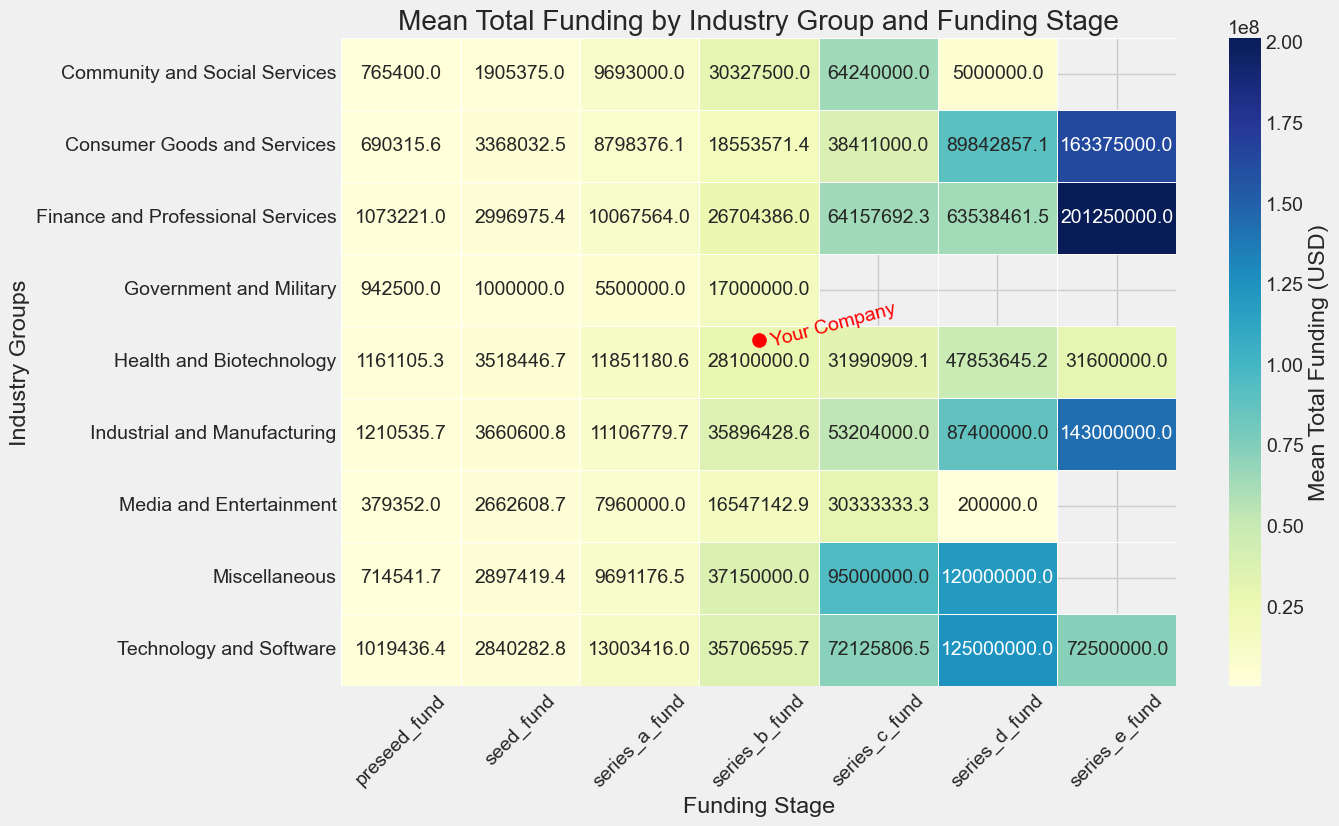

In [482]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_final is already loaded in your local environment

# Set the style
plt.style.use('fivethirtyeight')

# List of funding ratio columns in chronological order
funding_stages = ['preseed_fund', 'seed_fund', 'series_a_fund', 'series_b_fund', 'series_c_fund', 'series_d_fund', 'series_e_fund']

# Calculate mean total funding for each industry group at each funding stage
mean_funding = df_final.groupby('industry_groups')[funding_stages].mean().reset_index()

# Melt the DataFrame to make it suitable for a heat map
melted_df = mean_funding.melt(id_vars='industry_groups', var_name='Funding Stage', value_name='Mean Total Funding')

# Ensure the funding stages are in chronological order
melted_df['Funding Stage'] = pd.Categorical(melted_df['Funding Stage'], categories=funding_stages, ordered=True)

# Create the heat map
plt.figure(figsize=(12, 8))
heatmap_data = melted_df.pivot('industry_groups', 'Funding Stage', 'Mean Total Funding')
ax = sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Mean Total Funding (USD)'}, linewidths=.5)

# Add a marker for "Your Company"
your_company_industry = 'Health and Biotechnology'
your_company_stage = 'series_b_fund'
plt.scatter(funding_stages.index(your_company_stage) + 0.5, 
            heatmap_data.index.get_loc(your_company_industry) + 0.2, 
            color='red', s=100, zorder=5)
plt.text(funding_stages.index(your_company_stage) + 0.55, 
         heatmap_data.index.get_loc(your_company_industry), 
         ' Your Company', color='red', fontsize=14, rotation=15, ha='left', va='center')

# Labels and title
plt.xlabel('Funding Stage')
plt.ylabel('Industry Groups')
plt.title('Mean Total Funding by Industry Group and Funding Stage')

# Adjust x-axis labels for better readability
plt.xticks(rotation=45)

# Save the figure
#plt.savefig('/Users/andreas/Desktop/03 - Le Wagon/Data ViZ/mean_total_funding_heat_map_with_your_company.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

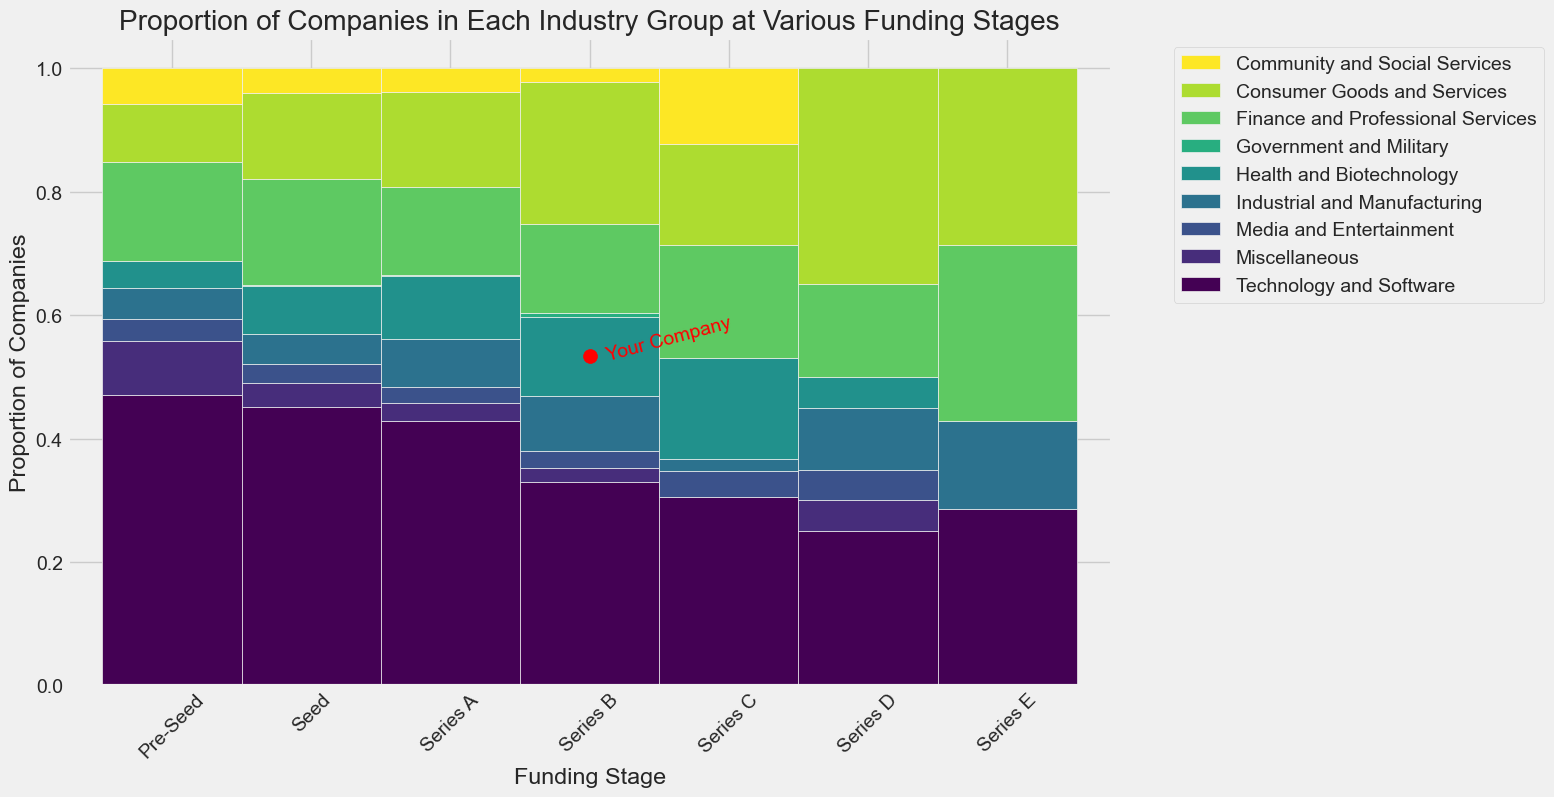

In [498]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming df_final is already loaded in your local environment

# Set the style
plt.style.use('fivethirtyeight')

# List of funding stages in chronological order
funding_stages = ['Pre-Seed', 'Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E']

# Create a DataFrame to count companies in each industry group at each funding stage
funding_stage_counts = df_final.groupby(['last_funding_type', 'industry_groups']).size().unstack(fill_value=0)

# Ensure the funding stages are in chronological order
funding_stage_counts = funding_stage_counts.loc[funding_stages]

# Normalize the counts to proportions
funding_stage_proportions = funding_stage_counts.div(funding_stage_counts.sum(axis=1), axis=0)

# Reverse the order of columns for the legend
funding_stage_proportions = funding_stage_proportions[funding_stage_proportions.columns[::-1]]

# Create the proportional area (stacked bar) chart with no space between bars
ax = funding_stage_proportions.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis', width=1)

# Labels and title
plt.xlabel('Funding Stage')
plt.ylabel('Proportion of Companies')
plt.title('Proportion of Companies in Each Industry Group at Various Funding Stages')

# Adjust x-axis labels for better readability
plt.xticks(rotation=45)

# Invert the legend order
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a marker for "Your Company"
your_company_funding_stage = 'Series B'
your_company_industry = 'Health and Biotechnology'
x_position = funding_stages.index(your_company_funding_stage)

# Calculate the cumulative sum to place the dot correctly
y_positions = funding_stage_proportions.loc[your_company_funding_stage].cumsum().values
industry_index = funding_stage_proportions.columns.get_loc(your_company_industry)
bottom_position = y_positions[industry_index - 1] if industry_index > 0 else 0
top_position = y_positions[industry_index]

# Place the dot in the middle of the segment
y_position = bottom_position + (top_position - bottom_position) / 2

plt.scatter(x_position, y_position, color='red', s=100, zorder=5)
plt.text(x_position, y_position +0.025, '   Your Company', color='red', fontsize=14, rotation=15, ha='left', va='center')

# Save the figure
#plt.savefig('/Users/andreas/Desktop/03 - Le Wagon/Data ViZ/proportional_area_chart_with_your_company.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

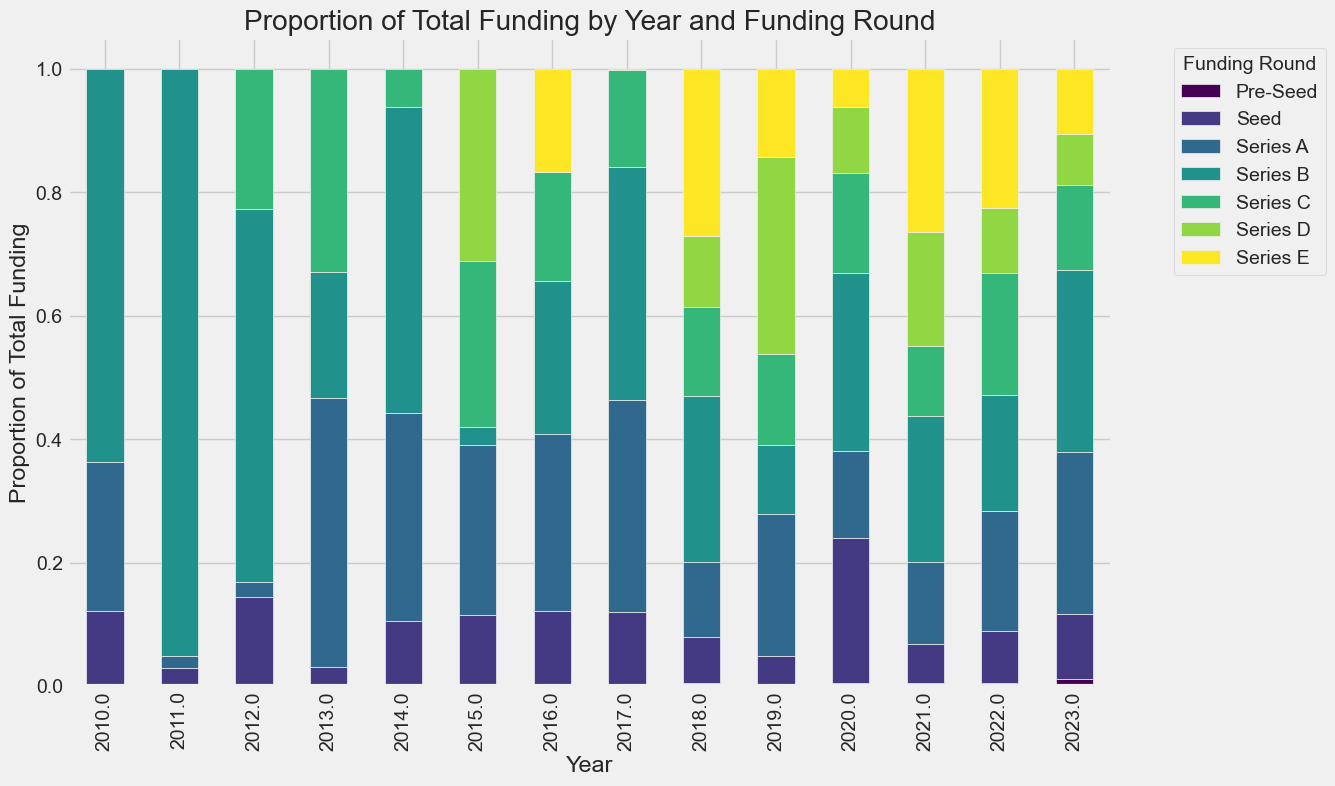

In [502]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_final is already loaded in your local environment

# Set the style
plt.style.use('fivethirtyeight')

# List of funding rounds in chronological order
funding_rounds = ['Pre-Seed', 'Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E']

# Filter the data to include only the necessary columns and rows
df_filtered = df_final[['last_funding_type', 'last_funding_year', 'total_funding_usd']].dropna()
df_filtered = df_filtered[df_filtered['last_funding_year'].between(2009, 2023)]
df_filtered = df_filtered[df_filtered['last_funding_type'].isin(funding_rounds)]

# Convert total funding to numeric and handle errors
df_filtered['total_funding_usd'] = pd.to_numeric(df_filtered['total_funding_usd'], errors='coerce')

# Group by funding round and year, then sum the total funding
funding_by_year = df_filtered.groupby(['last_funding_year', 'last_funding_type'])['total_funding_usd'].sum().unstack().fillna(0)

# Normalize the funding to proportions for each year
funding_proportions_by_year = funding_by_year.div(funding_by_year.sum(axis=1), axis=0)

# Create the stacked bar plot
plt.figure(figsize=(12, 8))
funding_proportions_by_year.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis', ax=plt.gca())

# Labels and title
plt.xlabel('Year')
plt.ylabel('Proportion of Total Funding')
plt.title('Proportion of Total Funding by Year and Funding Round')

# Add legend
plt.legend(title='Funding Round', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure
#plt.savefig('/Users/andreas/Desktop/03 - Le Wagon/Data ViZ/proportional_funding_by_year.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

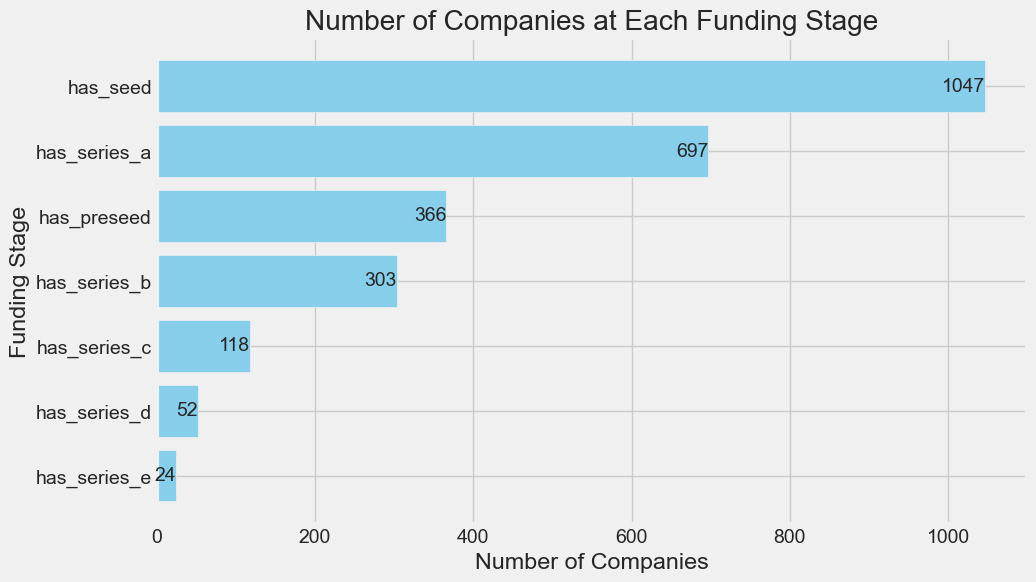

In [504]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_final is already loaded in your local environment

# Set the style
plt.style.use('fivethirtyeight')

# List of 'has_round' columns in order
has_round_columns = ['has_preseed', 'has_seed', 'has_series_a', 'has_series_b', 'has_series_c', 'has_series_d', 'has_series_e']

# Count the number of 1s in each 'has_round' column, ignoring NaN values
funnel_data = df_final[has_round_columns].sum().sort_values(ascending=False)

# Plot the funnel chart
plt.figure(figsize=(10, 6))
plt.barh(funnel_data.index, funnel_data.values, color='skyblue')

# Labels and title
plt.xlabel('Number of Companies')
plt.ylabel('Funding Stage')
plt.title('Number of Companies at Each Funding Stage')

# Add value labels to the bars
for index, value in enumerate(funnel_data.values):
    plt.text(value, index, str(int(value)), va='center', ha='right')

# Invert y-axis to have the funnel shape
plt.gca().invert_yaxis()

# Save the figure
#plt.savefig('/Users/andreas/Desktop/03 - Le Wagon/Data ViZ/funnel_chart.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

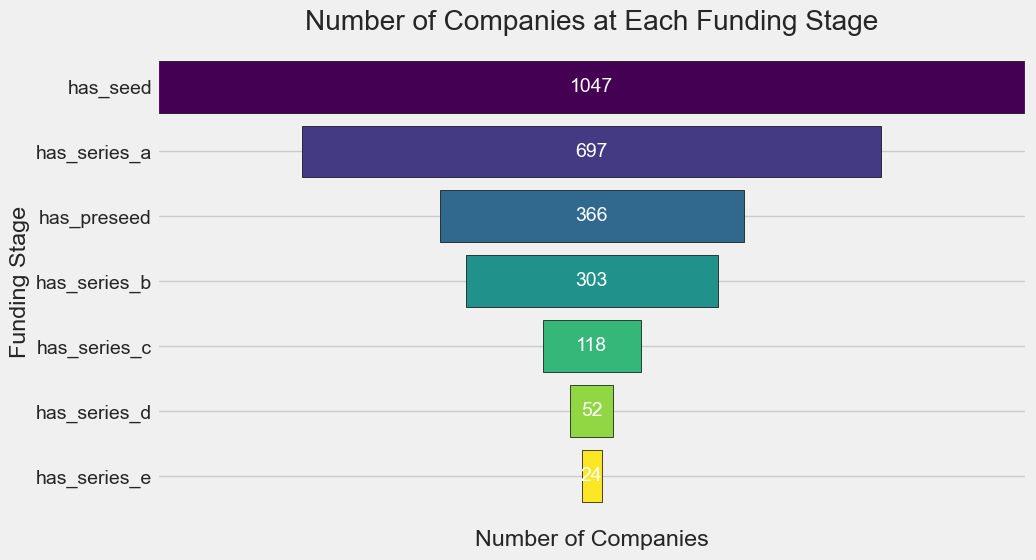

In [505]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df_final is already loaded in your local environment

# Set the style
plt.style.use('fivethirtyeight')

# List of 'has_round' columns in order
has_round_columns = ['has_preseed', 'has_seed', 'has_series_a', 'has_series_b', 'has_series_c', 'has_series_d', 'has_series_e']

# Count the number of 1s in each 'has_round' column, ignoring NaN values
funnel_data = df_final[has_round_columns].sum().sort_values(ascending=False)

# Define colors using the viridis palette
colors = plt.cm.viridis(np.linspace(0, 1, len(funnel_data)))

# Plot the funnel chart
plt.figure(figsize=(10, 6))
bars = plt.barh(funnel_data.index, funnel_data.values, color=colors, edgecolor='black')

# Center the bars by setting the x limits
max_value = funnel_data.values[0]
plt.xlim(-max_value / 2, max_value / 2)

# Adjust the positions of the bars to make them centered
for bar in bars:
    width = bar.get_width()
    bar.set_x(-width / 2)

# Remove the x-ticks
plt.xticks([])

# Labels and title
plt.xlabel('Number of Companies')
plt.ylabel('Funding Stage')
plt.title('Number of Companies at Each Funding Stage')

# Add value labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2, str(int(width)), va='center', ha='center', color='white')

# Invert y-axis to have the funnel shape
plt.gca().invert_yaxis()

# Save the figure
#plt.savefig('/Users/andreas/Desktop/03 - Le Wagon/Data ViZ/funnel_chart.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

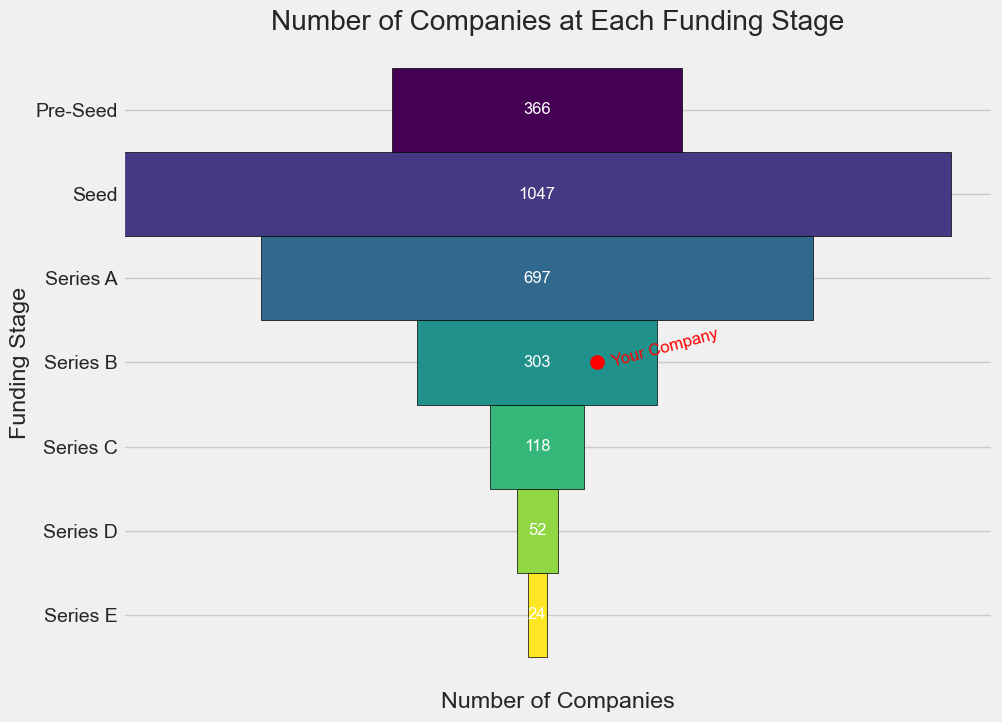

In [523]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df_final is already loaded in your local environment

# Set the style
plt.style.use('fivethirtyeight')

# List of 'has_round' columns in order
has_round_columns = ['has_preseed', 'has_seed', 'has_series_a', 'has_series_b', 'has_series_c', 'has_series_d', 'has_series_e']

# Count the number of 1s in each 'has_round' column, ignoring NaN values
funnel_data = df_final[has_round_columns].sum().reindex(has_round_columns)

# Define colors using the viridis palette
colors = plt.cm.viridis(np.linspace(0, 1, len(funnel_data)))

# Plot the funnel chart
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Define the widths and heights for the bars to create the funnel effect
widths = funnel_data.values
heights = np.diff(np.hstack([widths, 0])) / 2

for i, (width, height) in enumerate(zip(widths, heights)):
    left = -width / 2
    bottom = i - height / 2
    ax.barh(i, width, left=left, height=1, color=colors[i], edgecolor='black')

# Remove the x-ticks
plt.xticks([])

# Set the y-ticks with funding stages
plt.yticks(range(len(has_round_columns)), ['Pre-Seed', 'Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E'])

# Labels and title
plt.xlabel('Number of Companies')
plt.ylabel('Funding Stage')
plt.title('Number of Companies at Each Funding Stage')

# Add value labels to the bars
for i, width in enumerate(widths):
    plt.text(0, i, str(int(width)), va='center', ha='center', color='white', fontsize=12)

# Invert y-axis to have the funnel shape
plt.gca().invert_yaxis()

# Save the figure
#plt.savefig('/Users/andreas/Desktop/03 - Le Wagon/Data ViZ/funnel_chart.png', dpi=300, bbox_inches='tight')

# Define "Your Company" details
your_company_funding_stage = 'has_series_b'
your_company_value = 50  # Example value for your company

# Find the position of "Your Company" in the funnel
your_company_index = has_round_columns.index(your_company_funding_stage)

# Calculate the position to place the marker
width = funnel_data.values[your_company_index]
left = -width / 2
bottom = your_company_index

# Place the marker for "Your Company" slightly off-center to avoid obscuring the label
marker_x_position = width / 4  # One-quarter length of the bar

plt.scatter(marker_x_position, bottom, color='red', s=100, zorder=5)
plt.text(marker_x_position, bottom -0.15, '   Your Company', color='red', fontsize=12, rotation=15, ha='left', va='center')

# Show the figure
plt.show()

In [527]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the estimated revenue ranges and sort them
revenue_ranges = ['$100M to $500M', '$1M to $10M', '$10M to $50M', '$50M to $100M', 'Less than $1M', '$10B+', '$500M to $1B', '$1B to $10B']
sorted_revenue_ranges = sorted(revenue_ranges, key=lambda x: float(x.split()[0].replace('$', '').replace('B', '').replace('M', '').replace('+', '')))

# Assume "Your Company" falls into the '$50M to $100M' range
your_company_revenue_range = '$50M to $100M'
your_company_index = sorted_revenue_ranges.index(your_company_revenue_range)

# Number of sectors
N = len(sorted_revenue_ranges)

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': 'polar'})
plt.style.use('fivethirtyeight')

# Create an array of values for the sectors
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# Append the start angle to the end to close the plot
angles += angles[:1]

# Viridis color palette
colors = plt.cm.viridis(np.linspace(0, 1, N))

# Plot each sector with corresponding color
for i in range(N):
    ax.fill_between([angles[i], angles[i + 1]], 0, 1, color=colors[i], alpha=0.75)

# Set the revenue labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(sorted_revenue_ranges, fontsize=12)

# Remove the y-ticks
ax.set_yticklabels([])

# Add the arrow pointing to "Your Company"
arrow_angle = angles[your_company_index] + (angles[your_company_index + 1] - angles[your_company_index]) / 2
ax.annotate('',
            xy=(arrow_angle, 0.7), xycoords='data',
            xytext=(0.5, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='red', shrink=0.05, width=2))

# Add a label for "Your Company"
ax.text(arrow_angle, 0.75, 'Your Company', horizontalalignment='center', color='red', fontsize=12, fontweight='bold', rotation=15)

# Title
plt.title('Estimated Revenue Ranges', size=20, color='black', y=1.1)

# Show the plot
plt.show()

ValueError: could not convert string to float: 'Less'

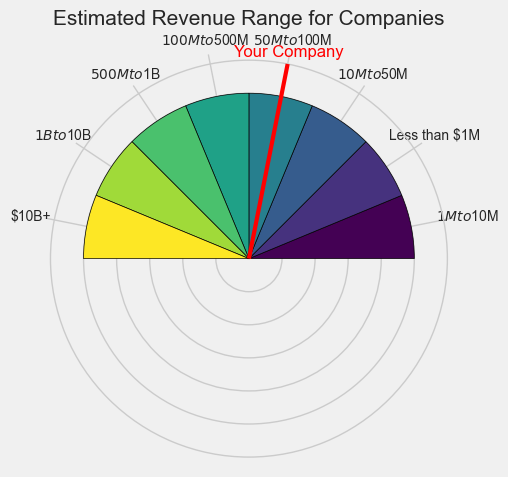

In [528]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df_final is already loaded in your local environment

# Set the style
plt.style.use('fivethirtyeight')

# Define the revenue ranges in ascending order
revenue_ranges = ['$1M to $10M', 'Less than $1M', '$10M to $50M', '$50M to $100M', '$100M to $500M', '$500M to $1B', '$1B to $10B', '$10B+']

# Sort the revenue ranges and remove NaN values
df_final = df_final.dropna(subset=['Estimated Revenue Range'])
df_final = df_final[df_final['Estimated Revenue Range'].isin(revenue_ranges)]

# Hypothetical "Your Company" details
your_company_revenue = '$50M to $100M'  # Example value

# Calculate the position of "Your Company" in the revenue ranges
your_company_index = revenue_ranges.index(your_company_revenue)

# Create the gauge chart
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': 'polar'})
theta = np.linspace(0, np.pi, len(revenue_ranges) + 1)

# Create the bars for the gauge
bars = ax.bar(theta[:-1], np.ones(len(revenue_ranges)), width=np.diff(theta), align='edge', color=plt.cm.viridis(np.linspace(0, 1, len(revenue_ranges))), edgecolor='black')

# Set the labels for the revenue ranges
ax.set_xticks(theta[:-1] + np.diff(theta) / 2)
ax.set_xticklabels(revenue_ranges, fontsize=10)

# Hide the radial labels and the frame
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)

# Add a pointer for "Your Company"
ax.plot([theta[your_company_index] + np.diff(theta)[0] / 2, theta[your_company_index] + np.diff(theta)[0] / 2], [0, 1.2], color='red', linewidth=3)
ax.text(theta[your_company_index] + np.diff(theta)[0] / 2, 1.25, 'Your Company', color='red', fontsize=12, ha='center')

# Title and layout adjustments
plt.title('Estimated Revenue Range for Companies', fontsize=15)
plt.tight_layout()

# Save the figure
#plt.savefig('/Users/andreas/Desktop/03 - Le Wagon/Data ViZ/angular_gauge_chart.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

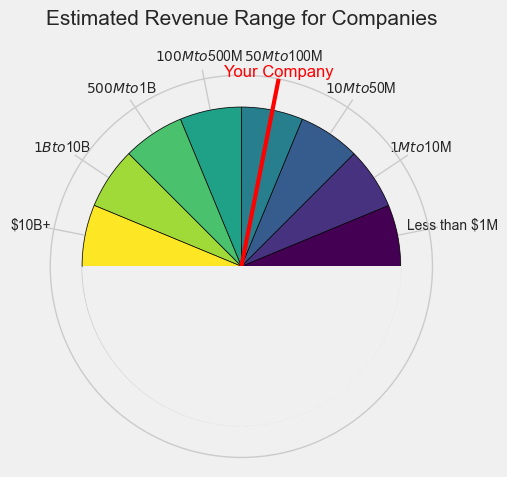

In [535]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df_final is already loaded in your local environment

# Set the style
plt.style.use('fivethirtyeight')

# Define the revenue ranges in ascending order
revenue_ranges = ['Less than $1M', '$1M to $10M', '$10M to $50M', '$50M to $100M', '$100M to $500M', '$500M to $1B', '$1B to $10B', '$10B+']

# Sort the revenue ranges and remove NaN values
df_final = df_final.dropna(subset=['Estimated Revenue Range'])
df_final = df_final[df_final['Estimated Revenue Range'].isin(revenue_ranges)]

# Hypothetical "Your Company" details
your_company_revenue = '$50M to $100M'  # Example value

# Calculate the position of "Your Company" in the revenue ranges
your_company_index = revenue_ranges.index(your_company_revenue)

# Create the gauge chart
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': 'polar'})
theta = np.linspace(0, np.pi, len(revenue_ranges) + 1)

# Create the bars for the gauge
bars = ax.bar(theta[:-1], np.ones(len(revenue_ranges)), width=np.diff(theta), align='edge', color=plt.cm.viridis(np.linspace(0, 1, len(revenue_ranges))), edgecolor='black')

# Set the labels for the revenue ranges
ax.set_xticks(theta[:-1] + np.diff(theta) / 2)
ax.set_xticklabels(revenue_ranges, fontsize=10)

# Hide the radial labels and the frame
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)

# Add a pointer for "Your Company"
ax.plot([theta[your_company_index] + np.diff(theta)[0] / 2, theta[your_company_index] + np.diff(theta)[0] / 2], [0, 1.2], color='red', linewidth=3)
ax.text(theta[your_company_index] + np.diff(theta)[0] / 2, 1.22, 'Your Company', color='red', fontsize=12, ha='center')

# Obscure the bottom half of the circle
ax.fill_between(np.linspace(np.pi, 2*np.pi, 100), 0, 1, color='#f0f0f0', zorder=10)

# Title and layout adjustments
plt.title('Estimated Revenue Range for Companies', fontsize=15, pad=30)
plt.tight_layout()

# Save the figure
#plt.savefig('/Users/andreas/Desktop/03 - Le Wagon/Data ViZ/angular_gauge_chart.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()